In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
df = pd.read_excel('./E-Commerce-Dataset.xlsx', sheet_name='E Comm')
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [3]:
df.shape

(5630, 20)

In [4]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
customer_churn = np.round(df['Churn'].value_counts()/len(df)*100)

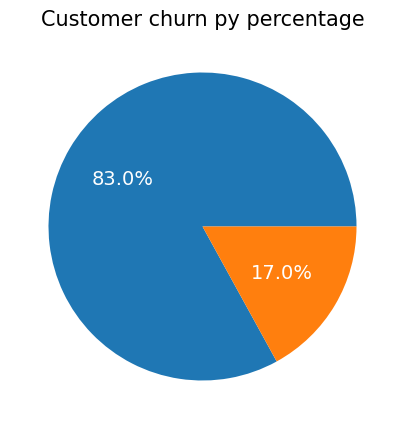

In [7]:
plt.figure(figsize=(10,5))
plt.pie(customer_churn, autopct='%1.1f%%', textprops={'color': 'white', 'fontsize': 14})
plt.title('Customer churn py percentage', size=15)
plt.show()

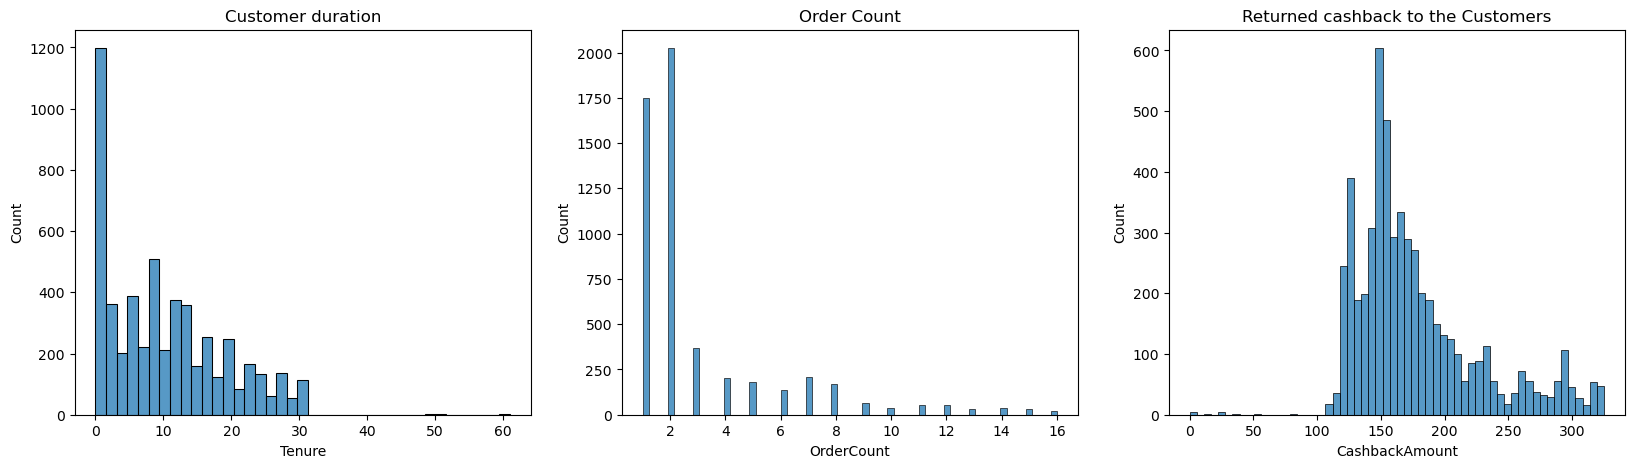

In [8]:
fig, axes = plt.subplots(1,3, figsize=(20, 5))

# Tenure
sns.histplot(data=df, x='Tenure', ax=axes[0])
axes[0].set_title('Customer duration')

# Order Count
sns.histplot(data=df, x='OrderCount', ax=axes[1])
axes[1].set_title('Order Count')

# Cashback
sns.histplot(data=df, x='CashbackAmount', ax=axes[2])
axes[2].set_title('Returned cashback to the Customers')

plt.show()

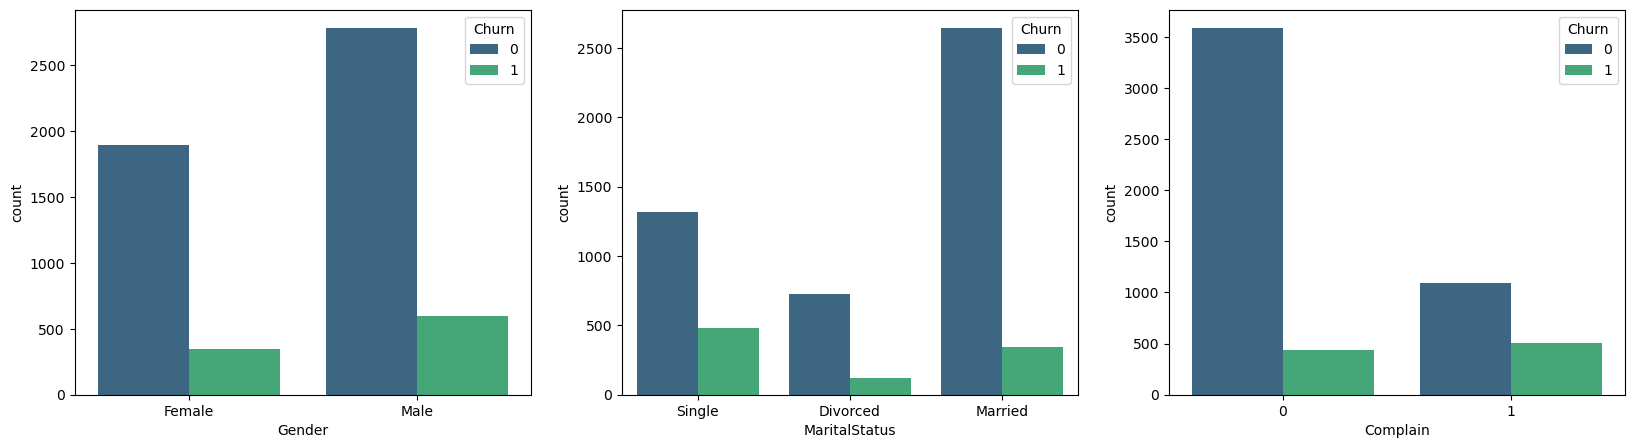

In [9]:
fig, axes = plt.subplots(1,3, figsize=(20, 5))

sns.countplot(data=df, x='Gender', hue='Churn', palette='viridis', ax=axes[0])
axes[0].set_title = 'Churn by Gender'

sns.countplot(data=df, x='MaritalStatus', hue='Churn', palette='viridis', ax=axes[1])
axes[1].set_title = 'Churn by Marital Status'

sns.countplot(data=df, x='Complain', hue='Churn', palette='viridis', ax=axes[2])
axes[2].set_title = 'Churn by Complains'

plt.show()

In [10]:
df.drop('CustomerID', axis=1).corr(numeric_only=True).style.background_gradient()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.349408,0.084703,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,-0.010058,-0.008264,-0.028697,-0.160757,-0.154118
Tenure,-0.349408,1.000000,-0.060688,-0.018218,-0.021226,-0.023983,-0.013903,0.237666,-0.021268,0.005825,0.129035,0.186403,0.184552,0.476380
CityTier,0.084703,-0.060688,1.000000,0.010624,-0.009150,0.027934,-0.011554,-0.029440,0.003375,-0.031408,0.021456,0.033388,0.017525,0.055746
WarehouseToHome,0.076630,-0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,-0.011020,0.028696,0.038795,-0.003935,0.002681,0.017829,-0.009200
HourSpendOnApp,0.018675,-0.021226,-0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490
NumberOfDeviceRegistered,0.107939,-0.023983,0.027934,0.019071,0.316800,1.000000,-0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183
SatisfactionScore,0.105481,-0.013903,-0.011554,0.007722,0.031858,-0.017228,1.000000,0.053583,-0.031115,-0.027730,0.017936,0.019764,0.032082,0.003473
NumberOfAddress,0.043931,0.237666,-0.029440,-0.011020,0.145126,0.084997,0.053583,1.000000,-0.026399,0.015533,0.042120,-0.007609,-0.064847,0.186688
Complain,0.250188,-0.021268,0.003375,0.028696,0.006976,0.003407,-0.031115,-0.026399,1.000000,-0.004529,-0.008174,-0.019307,-0.043546,0.000525
OrderAmountHikeFromlastYear,-0.010058,0.005825,-0.031408,0.038795,0.106843,0.069475,-0.027730,0.015533,-0.004529,1.000000,0.033201,0.023101,0.006003,0.017869


In [11]:
df.drop('CustomerID', axis=1).corrwith(df['Churn'], numeric_only=True).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

In [12]:
data = df[['Churn', 'Tenure', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'Gender', 'MaritalStatus']]

In [13]:
data.shape

(5630, 9)

In [14]:
data.isna().sum()/len(df)*100

Churn                       0.000000
Tenure                      4.689165
Complain                    0.000000
DaySinceLastOrder           5.452931
CashbackAmount              0.000000
NumberOfDeviceRegistered    0.000000
SatisfactionScore           0.000000
Gender                      0.000000
MaritalStatus               0.000000
dtype: float64

filling NaN values by rows mean

In [15]:
data.fillna(df.mean(numeric_only=True), inplace=True)

/var/folders/q4/47bgnsdd20d4r1dgw9h6m26c0000gn/T/ipykernel_15423/523306572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(df.mean(numeric_only=True), inplace=True)


In [16]:
data.corrwith(data['Churn'], numeric_only=True).abs().sort_values(ascending=False)

Churn                       1.000000
Tenure                      0.335513
Complain                    0.250188
DaySinceLastOrder           0.156152
CashbackAmount              0.154118
NumberOfDeviceRegistered    0.107939
SatisfactionScore           0.105481
dtype: float64

In [17]:
encoded = pd.get_dummies(data)
encoded.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,NumberOfDeviceRegistered,SatisfactionScore,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.000000,1,5.0,159.93,3,2,True,False,False,False,True
1,1,10.189899,1,0.0,120.90,4,3,False,True,False,False,True
2,1,10.189899,1,3.0,120.28,4,3,False,True,False,False,True
3,1,0.000000,0,3.0,134.07,4,5,False,True,False,False,True
4,1,0.000000,0,3.0,129.60,3,5,False,True,False,False,True


In [18]:
X = encoded.drop('Churn', axis=1)
y = encoded['Churn']

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [21]:
# model estimation 
def estimate_model(y_test, y_prediction):
    """Evaluates a classification model using multiple metrics."""

    # Classification Report
    print(metrics.classification_report(y_test, y_prediction))

    # Accuracy Score
    print('Accuracy score:', metrics.accuracy_score(y_test, y_prediction))

    confusion_matrix = metrics.confusion_matrix(y_test, y_prediction)
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix, annot=True, fmt='g')
    plt.show()

    # ROC curve
    fpr, tpr, threshholds = metrics.roc_curve(y_test, y_prediction)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc curve')
    display.plot()
    plt.show()

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       936
           1       0.72      0.39      0.51       190

    accuracy                           0.87      1126
   macro avg       0.80      0.68      0.72      1126
weighted avg       0.86      0.87      0.85      1126

Accuracy score: 0.8712255772646537


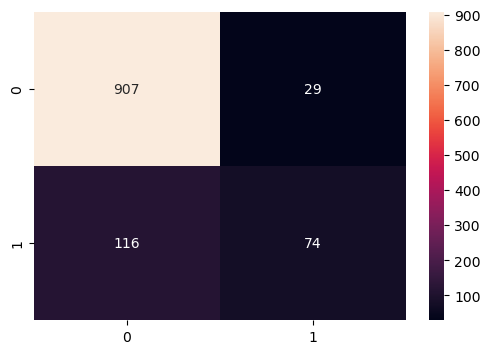

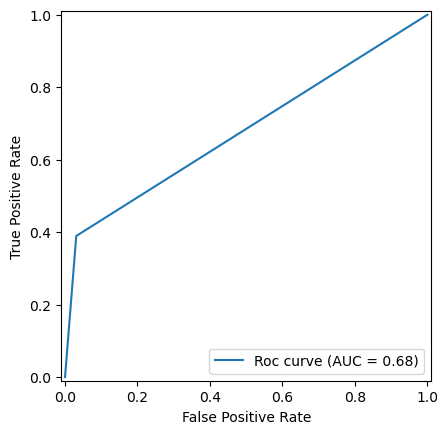

In [22]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

y_predict = LR_model.predict(X_test)
estimate_model(y_test, y_predict)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       936
           1       0.79      0.39      0.52       190

    accuracy                           0.88      1126
   macro avg       0.84      0.68      0.73      1126
weighted avg       0.87      0.88      0.86      1126

Accuracy score: 0.8792184724689165


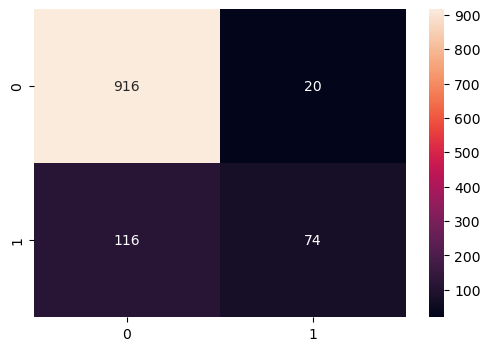

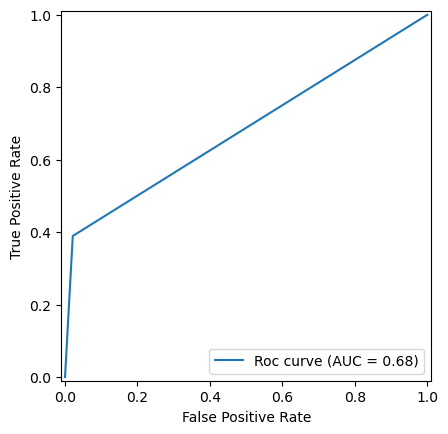

In [23]:
# support vector machines
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
estimate_model(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       936
           1       0.80      0.80      0.80       190

    accuracy                           0.93      1126
   macro avg       0.88      0.88      0.88      1126
weighted avg       0.93      0.93      0.93      1126

Accuracy score: 0.9325044404973357


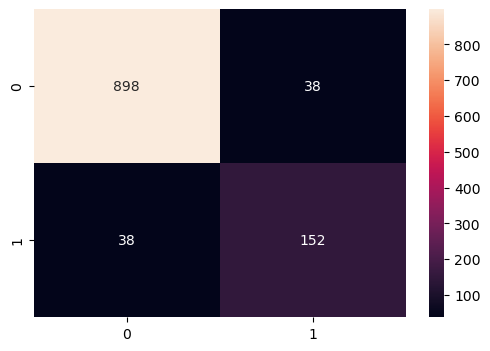

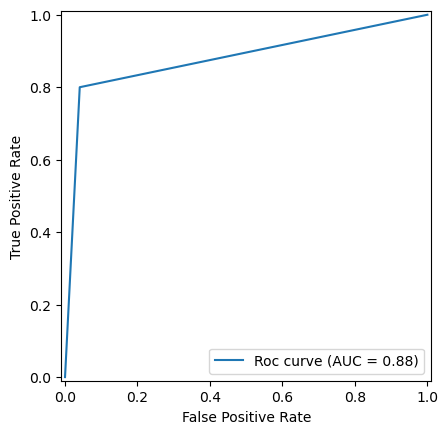

In [24]:
# decision tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
estimate_model(y_test, y_pred)

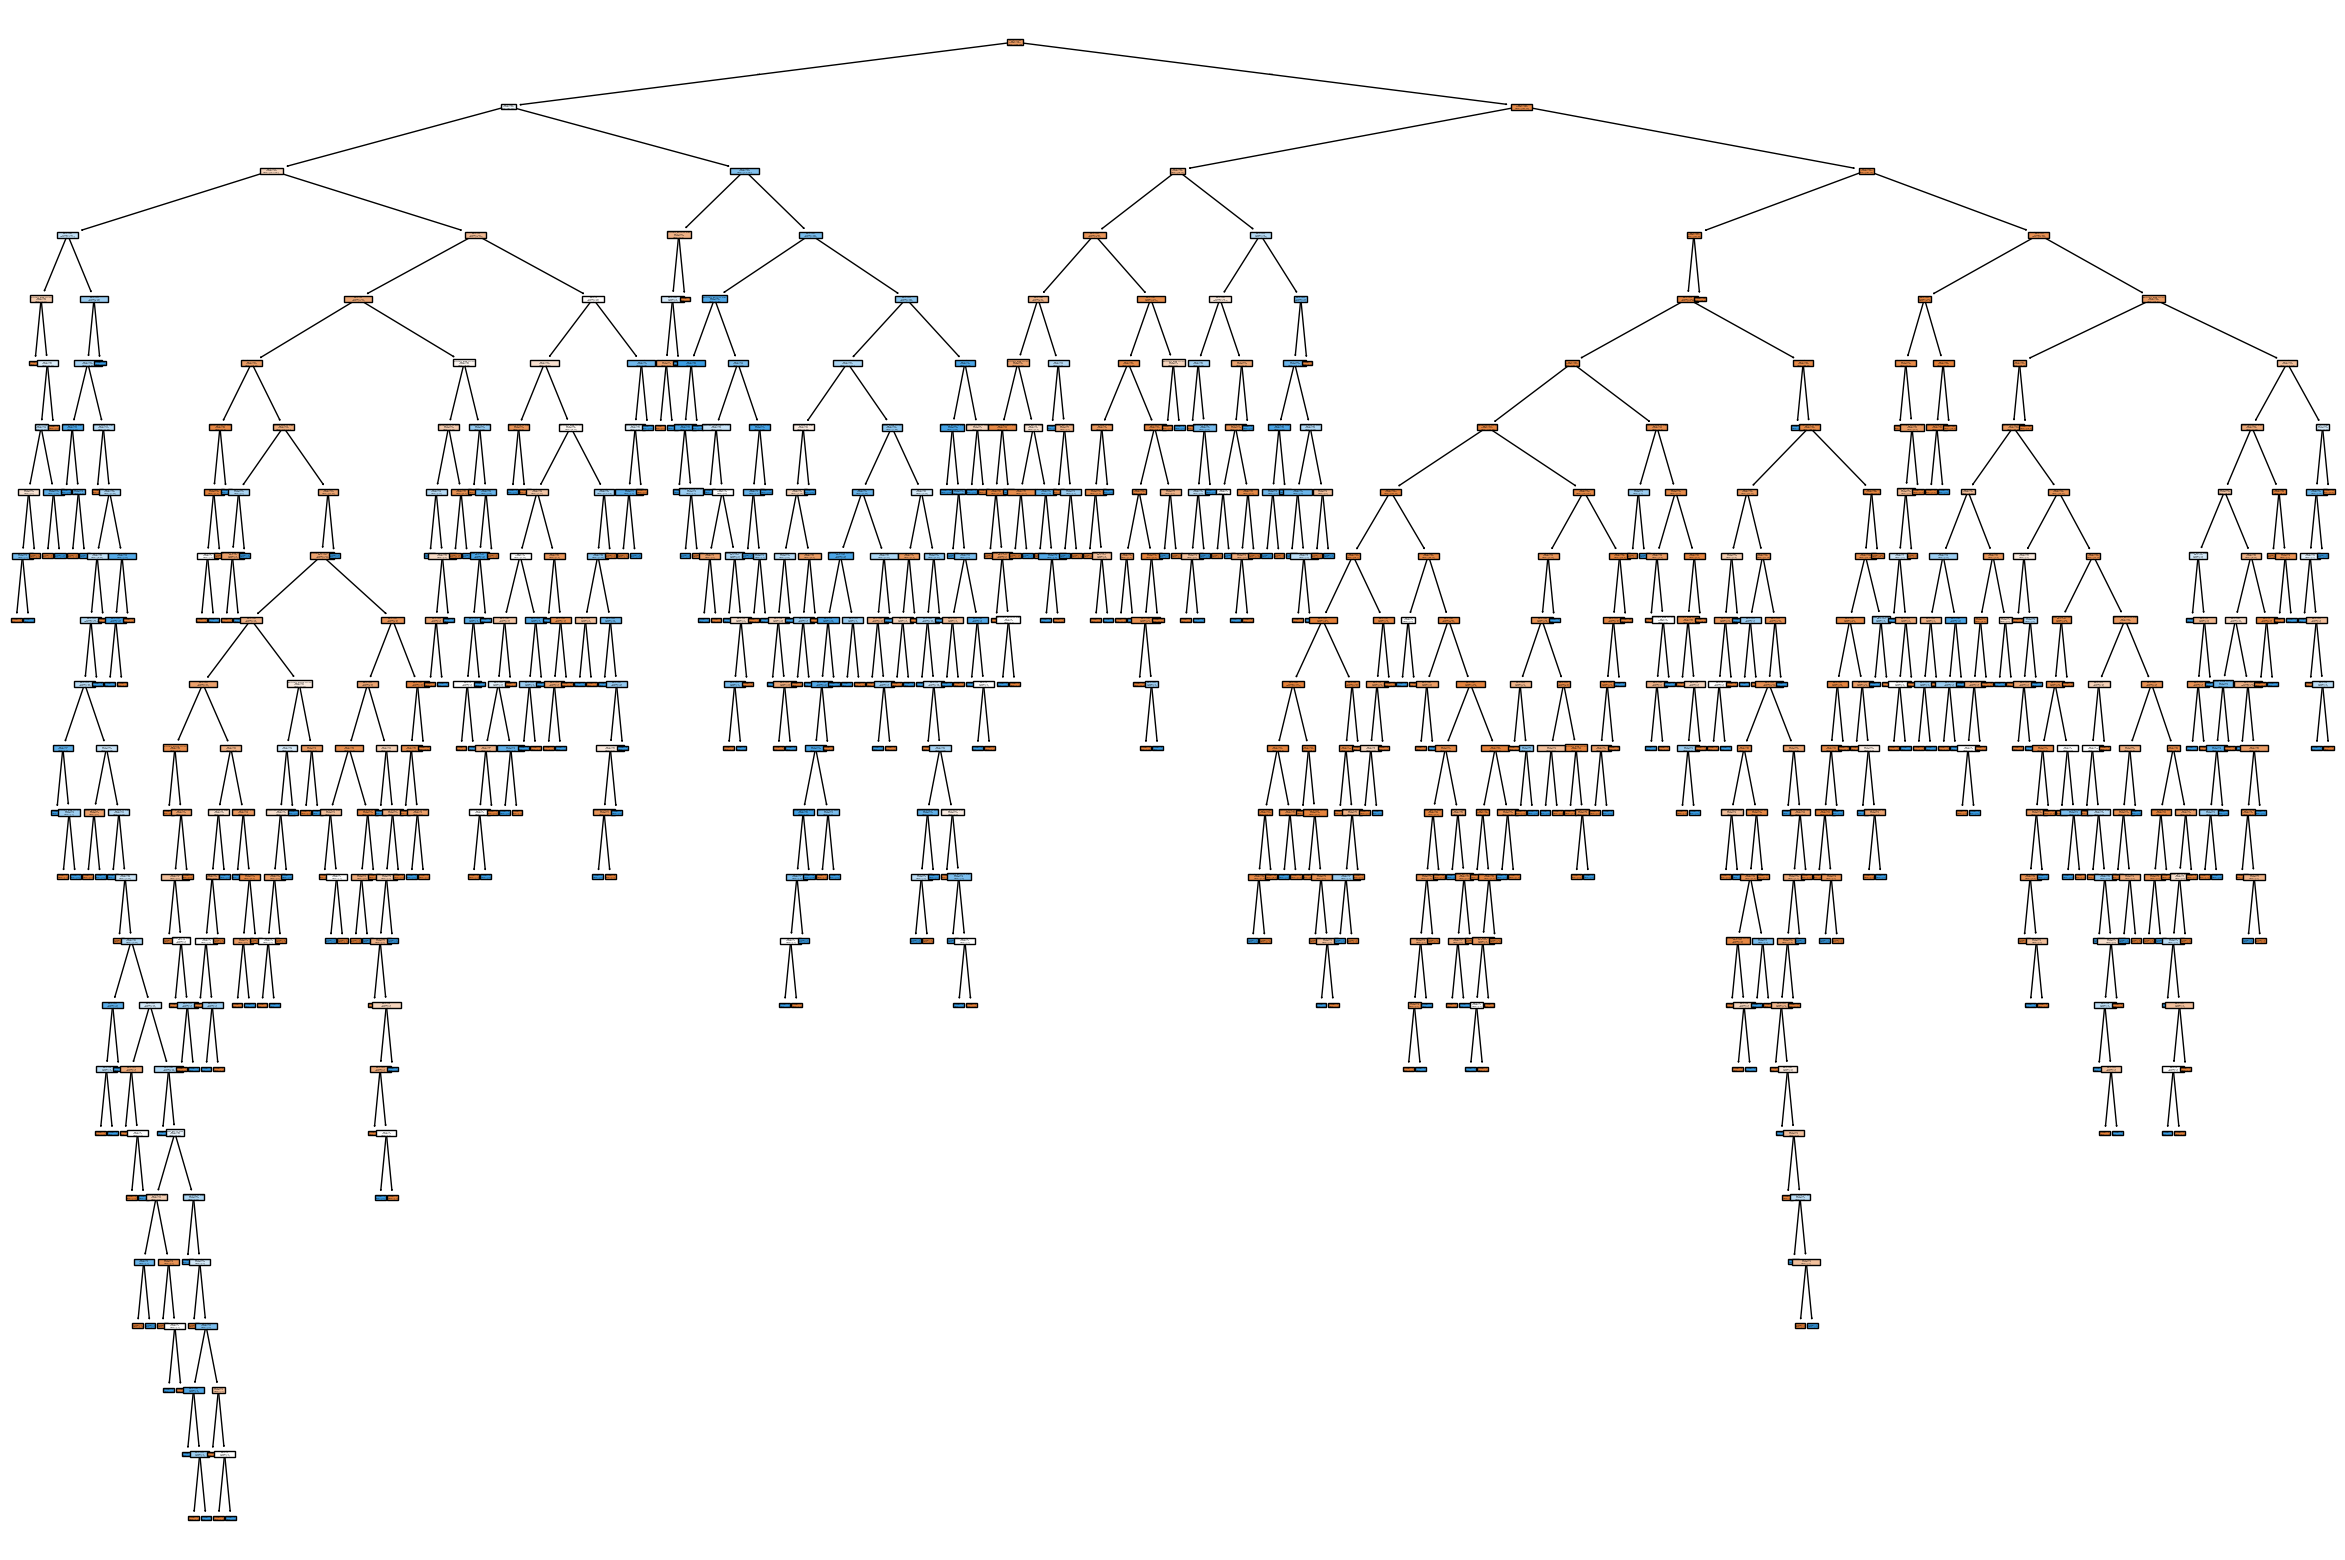

In [25]:
cols = encoded.drop('Churn', axis=1).columns

plt.figure(figsize=(30, 20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       936
           1       0.86      0.66      0.74       190

    accuracy                           0.92      1126
   macro avg       0.89      0.82      0.85      1126
weighted avg       0.92      0.92      0.92      1126

Accuracy score: 0.9236234458259325


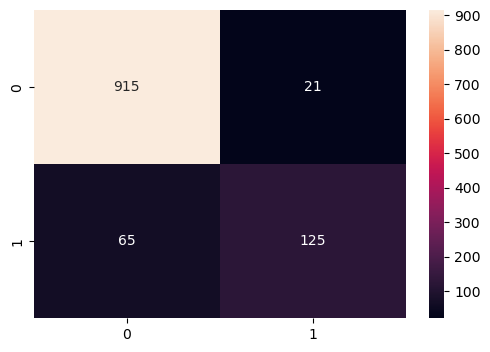

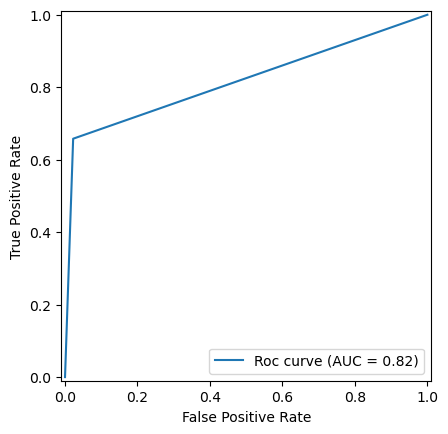

In [26]:
RV_model = RandomForestClassifier(n_estimators=10)
RV_model.fit(X_train, y_train)

y_pred = RV_model.predict(X_test)
estimate_model(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       936
           1       0.88      0.82      0.85       190

    accuracy                           0.95      1126
   macro avg       0.92      0.90      0.91      1126
weighted avg       0.95      0.95      0.95      1126

Accuracy score: 0.9502664298401421


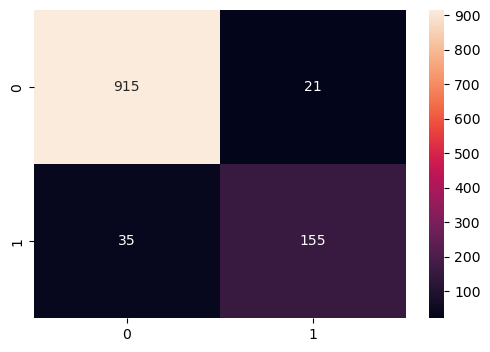

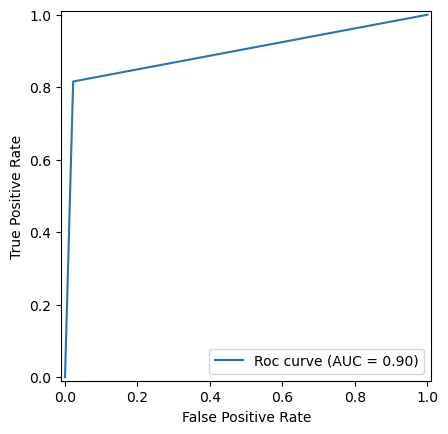

In [27]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
estimate_model(y_test, y_pred)